In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [3]:
# 1.1 Create DataFrame
data = pd.DataFrame({
    'Age': [36,42,23,52,43,44,66,35,52,35,24,18,45],
    'Experience': [10,12,4,4,21,14,3,14,13,5,3,3,9],
    'Rank': [9,4,6,4,8,5,7,9,7,9,5,7,9],
    'Nationality': ['UK','USA','N','USA','USA','UK','N','UK','N','N','USA','UK','UK'],
    'Go': ['NO','NO','NO','NO','YES','NO','YES','YES','YES','YES','NO','YES','YES']
})

In [4]:
#1.2. Label Encoding
le = LabelEncoder()
data['Nationality'] = le.fit_transform(data['Nationality'])  # N=0, UK=1, USA=2
data['Go'] = le.fit_transform(data['Go'])  # NO=0, YES=1

In [5]:
#1.3 Features and target
X = data.drop('Go', axis=1)
y = data['Go']


In [6]:
#1.4 Train decision tree
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [7]:
#1.5 Feature importances
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances:\n", importances)

Feature Importances:
 Rank           0.664063
Experience     0.335937
Age            0.000000
Nationality    0.000000
dtype: float64


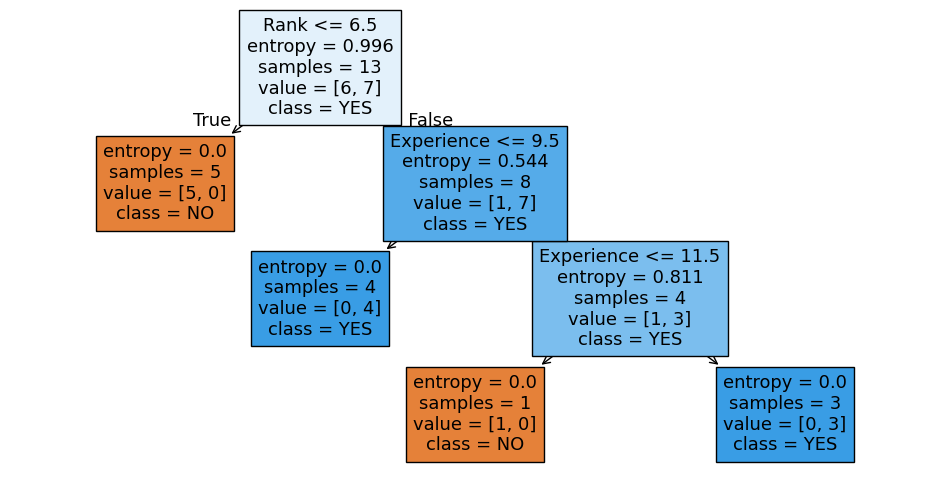

In [8]:
#1.6 Visualize the tree
plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=X.columns, class_names=['NO', 'YES'], filled=True)
plt.show()


In [9]:
#2.1 Importing Necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

In [11]:
#2.2 Load dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PAMPL/data.csv")

In [12]:
#2.3 Drop non-informative columns
df = df.drop(columns=["id", "Unnamed: 32"], errors='ignore')

In [13]:
#2.4 Encode target variable (diagnosis)
# M → 1 (Malignant), B → 0 (Benign)
label_encoder = LabelEncoder()
df["diagnosis"] = label_encoder.fit_transform(df["diagnosis"])

In [14]:
#2.5 Define features and target
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

In [15]:
#2.6 Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
#2.7 Train logistic regression model
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [18]:
#2.8 Predict probabilities for ROC curve
y_probs = model.predict_proba(X_test)[:, 1]

In [19]:
#2.9 Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

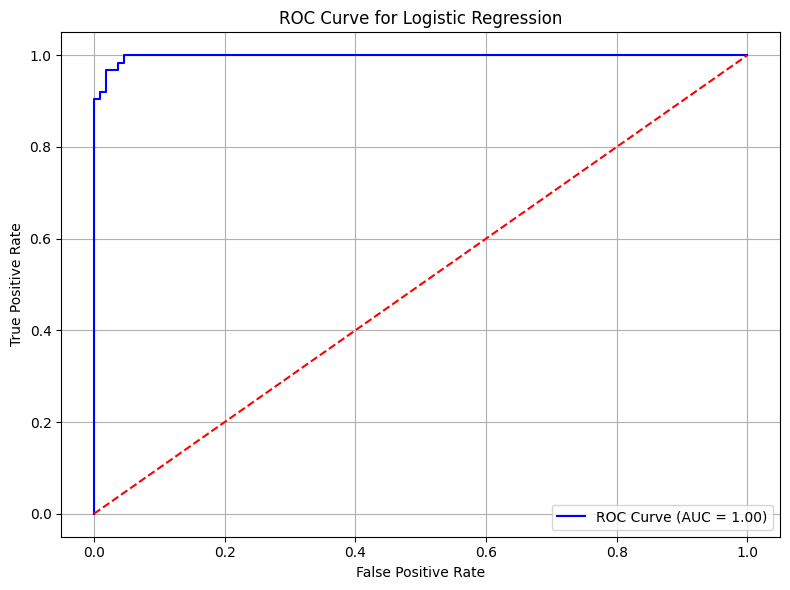

In [20]:
#2.10 Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title("ROC Curve for Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
#3.1 Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
#3.2 Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PAMPL/Task3_Data_TimeSeriesRegression (1).csv")

In [23]:
#3.3 Rename for clarity
df.columns = ['t', 'f_t']

In [24]:
#3.4 Prepare data for regression
X = df[['t']].values  # Independent variable (reshape as 2D)
y = df['f_t'].values  # Dependent variable

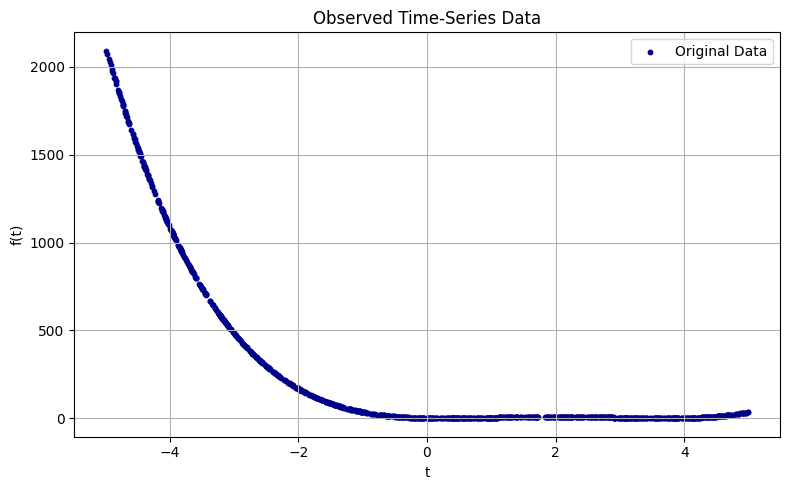

In [25]:
#3.5 Visualize original data
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='darkblue', s=10, label='Original Data')
plt.title("Observed Time-Series Data")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [26]:
#3.6 Polynomial Regression (degree 4)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

In [27]:
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

In [28]:
# Step 6: Model Evaluation
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

In [29]:
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")

Root Mean Squared Error (RMSE): 0.00
R-squared (R²): 1.0000


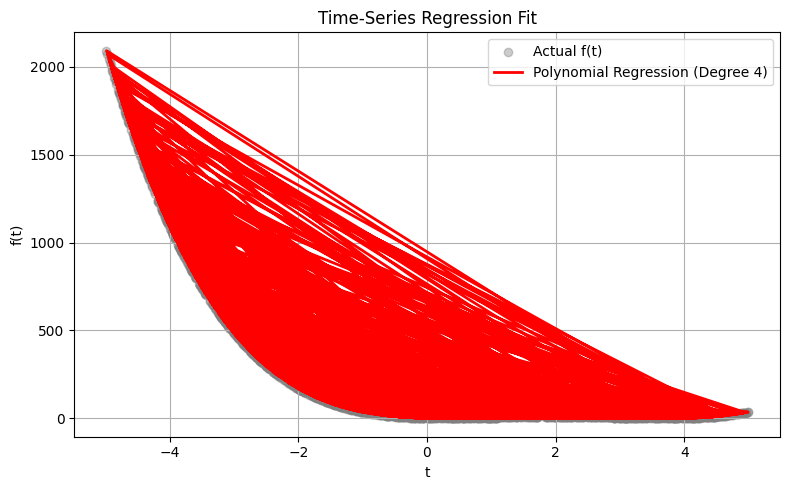

In [30]:
# Step 7: Plot regression curve
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='grey', alpha=0.4, label='Actual f(t)')
plt.plot(X, y_pred, color='red', linewidth=2, label='Polynomial Regression (Degree 4)')
plt.title("Time-Series Regression Fit")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

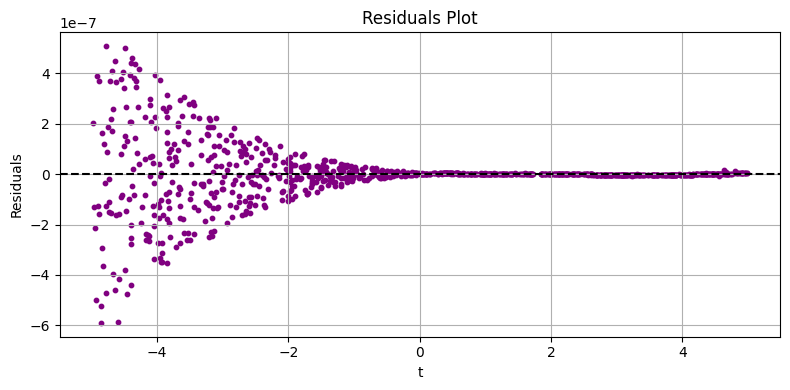

In [31]:
# Step 8: Residual Plot
residuals = y - y_pred
plt.figure(figsize=(8, 4))
plt.scatter(X, residuals, color='purple', s=10)
plt.axhline(0, linestyle='--', color='black')
plt.title("Residuals Plot")
plt.xlabel("t")
plt.ylabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()